In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib.animation

from math import log

In [2]:
num_clusters = 2  # for SBM
size_cluster = 20
# size_cluster = 10
N = size_cluster * num_clusters  # number of agents
# er_p = 2 * log(N) / N
er_p = 1.001 * log(N) / N  # for large instances
dynamic_p, dynamic_q = 0.05*log(N) / N, log(N) / N

## Erodos-Renyi
# if the graph is disconnected, keep trying other seeds until the graph is connected.
u = 2023
while not nx.is_connected(nx.erdos_renyi_graph(N, er_p, seed=u)):
    u += 1
Network_ER = nx.erdos_renyi_graph(N, er_p, seed=u)
Network_ER.name = f"ER_{er_p}"
pos_ER = nx.spring_layout(Network_ER)

# Barabasi-Albert
# m = 5  # for small instances
m = 3
Network_BA = nx.barabasi_albert_graph(N, m, seed=2023)
Network_BA.name = f"BA_{m}"
pos_BA = nx.spring_layout(Network_BA)

## Binary SBM
# sbm_p, sbm_q = 2 * er_p, 0.01
sbm_p, sbm_q = 2 * er_p, 0.001  # for large instances
u = 2023
while not nx.is_connected(
        nx.random_partition_graph([size_cluster for _ in range(num_clusters)], sbm_p, sbm_q, seed=u)):
    u += 1
Network_SBM = nx.random_partition_graph([size_cluster for _ in range(num_clusters)], sbm_p, sbm_q, seed=u)
Network_SBM.name = f"SBM_{sbm_p}_{sbm_q}"
pos_SBM = nx.spring_layout(Network_SBM)

In [12]:
for i in Network_SBM.adj[12]:
    print(i)

10
13
14
21


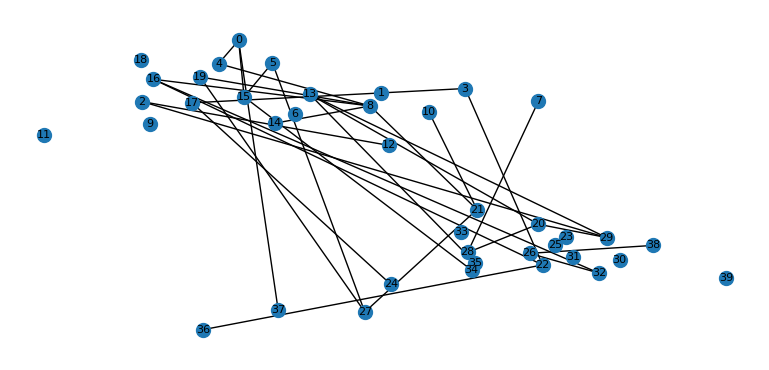

In [70]:
fig = plt.gcf()

Network = copy.deepcopy(Network_SBM)
pos = pos_SBM

for t in range(1000):
    fig.clf()
    cur_edges = nx.edges(Network)
    cur_non_edges = nx.non_edges(Network)
    for non_edge in cur_non_edges:
        if np.random.binomial(1, dynamic_p) == 1:
            Network.add_edge(non_edge[0], non_edge[1])
    for edge in cur_edges:
        if np.random.binomial(1, dynamic_q) == 1:
            Network.remove_edge(edge[0], edge[1])
    nx.draw(Network, with_labels=True, pos=pos, node_size=100, font_size=8)

    # i = num // 3
    # j = num % 3 + 1
    # triad = sequence_of_letters[i:i+3]
    # path = ["O"] + ["".join(sorted(set(triad[:k + 1]))) for k in range(j)]
    #
    # # Background nodes
    # nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="gray")
    # null_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=set(G.nodes()) - set(path), node_color="white",  ax=ax)
    # null_nodes.set_edgecolor("black")
    #
    # # Query nodes
    # query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, node_color=idx_colors[:len(path)], ax=ax)
    # query_nodes.set_edgecolor("white")
    # nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
    # edgelist = [path[k:k+2] for k in range(len(path) - 1)]
    # nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=idx_weights[:len(path)], ax=ax)
    #
    # # Scale plot ax
    # ax.set_title("Frame %d:    "%(num+1) +  " - ".join(path), fontweight="bold")
    # ax.set_xticks([])
    # ax.set_yticks([])


# anim = matplotlib.animation.FuncAnimation(fig, update, frames=1, interval=1000, repeat=True)

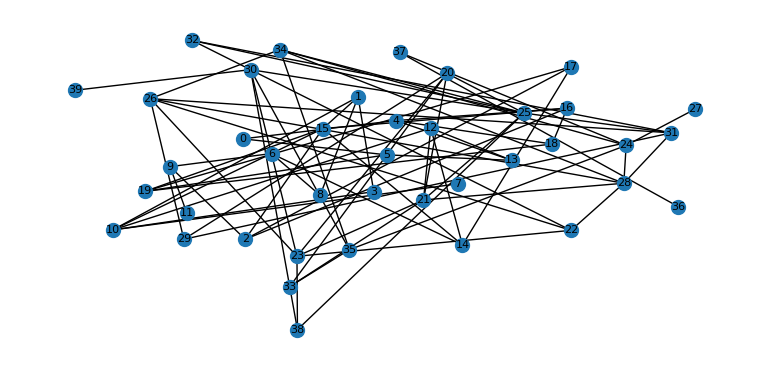

In [69]:
nx.draw(Network_SBM, with_labels=True, pos=pos, node_size=100, font_size=8)